In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
plt.rcParams['font.family']= ['Microsoft JhengHei']

In [3]:
df = pd.read_excel("COV_ACCT_FIN.xlsx")

In [4]:
df.tail()

,INSURED_RK,Policy_RK,RIDER_CD,payment_period,EFFECTIVE_DT,SHORT_NAME,prod_detail2,POLICY_HOLDER_RK,AFYP_NT,MATURITY_BENEFICIARY_RK,DEATH_BENEFICIARY_RK
134467,251944,172739,1,躉繳保費,2017-09-01,UPISA,SIN,251944,1.067771e+06,NaN,NaN
134468,251944,177608,1,躉繳保費,2018-02-01,BUISA,SIN,251944,9.829964e+05,NaN,NaN
134469,251944,58859,1,年繳,2018-04-14,RLTC,AHd,79529,1.081773e+05,79529.0,NaN
134470,251944,172892,1,躉繳保費,2018-04-28,UPISA,SIN,251944,1.100128e+06,NaN,NaN
134471,251945,177625,1,躉繳保費,2018-08-31,BVA,ILP,251945,3.150000e+05,NaN,120128.0


# Missing Value

In [5]:
df.isnull().sum(axis = 0)

INSURED_RK                     0
Policy_RK                      0
RIDER_CD                       0
payment_period                 0
EFFECTIVE_DT                   0
SHORT_NAME                     0
prod_detail2                   0
POLICY_HOLDER_RK               0
AFYP_NT                        0
MATURITY_BENEFICIARY_RK    41498
DEATH_BENEFICIARY_RK       30049
dtype: int64

In [6]:
# 有Missing value的列數(再購筆數)
sum([1 for i in df.isnull().sum(axis = 1) if i != 0])

57723

# 2 保單號碼

In [7]:
df['Policy_RK'].value_counts(dropna=False)

73446     13
37100     13
26748     13
107199    13
182448    13
          ..
449        1
2496       1
180633     1
182680     1
2047       1
Name: Policy_RK, Length: 74248, dtype: int64

# 3 主附約註記

In [8]:
df['RIDER_CD'].value_counts(dropna=False)

# 主約：1 附約：0

1    67804
0    66668
Name: RIDER_CD, dtype: int64

# 4 保費繳法

In [9]:
df['payment_period'].value_counts(dropna=False)

年繳      104294
躉繳保費     14522
月繳       10506
季繳        3138
半年繳       2012
Name: payment_period, dtype: int64

# 5 保單生效日

Text(-0.1, 1.02, '再購案件數')

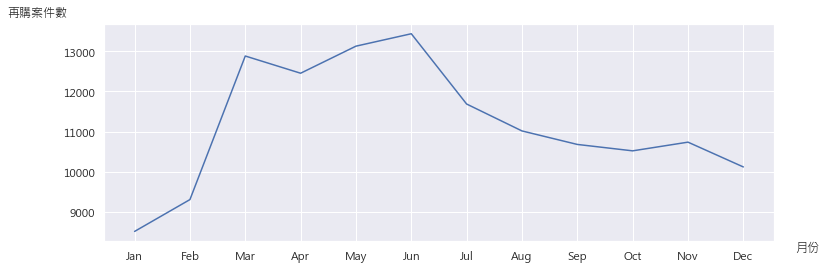

In [13]:
df['month'] = df['EFFECTIVE_DT'].apply(lambda x:x.month)
y = df['month'].value_counts().sort_index()

# 畫圖
sns.set()
plt.rcParams['font.family']= ['Microsoft JhengHei']
plt.figure(figsize=(12,4))
plt.plot(y)
plt.gca().xaxis.set(ticks=[i+1 for i in range(12)], ticklabels=calendar.month_abbr[1:13])
plt.gca().xaxis.set_label_coords(1.05,0)
plt.xlabel('月份')
plt.gca().yaxis.set_label_coords(-0.1,1.02)
plt.ylabel('再購案件數',rotation=0)

# 6 產品細項

In [14]:
df['SHORT_NAME'].value_counts(dropna=False)

PAR        10157
NPBBR       7888
AMN         7516
DHI         7481
MPL         5130
           ...  
SPUISL         1
BTL            1
MS             1
GCISARP        1
RML            1
Name: SHORT_NAME, Length: 171, dtype: int64

In [15]:
df['SHORT_NAME'].value_counts(dropna=False).describe()

count      171.000000
mean       786.385965
std       1580.680707
min          1.000000
25%         17.500000
50%        125.000000
75%        817.500000
max      10157.000000
Name: SHORT_NAME, dtype: float64

In [16]:
sum(1 for x in df['SHORT_NAME'].value_counts(dropna=False) if x > 100)

93

# 7 產品類型

* REG=期繳商品
* SIN=躉繳商品
* ILP=投資型商品
* AHa=住院手術商品
* AHb=重疾癌症
* AHc=意外保障
* AHd=長期照顧

In [17]:
df['prod_detail2'].value_counts(dropna=False)

AHc    44106
AHa    34747
REG    21309
AHb    12742
SIN     8594
AHd     6846
ILP     6128
Name: prod_detail2, dtype: int64

# 8 要保人RK

In [18]:
df['POLICY_HOLDER_RK'].value_counts(dropna=False)

23        46
38443     45
126483    42
249596    41
5832      41
          ..
249405     1
3653       1
38486      1
91752      1
39763      1
Name: POLICY_HOLDER_RK, Length: 39559, dtype: int64

# 9 保單保費

In [19]:
df['AFYP_NT'].value_counts(dropna=False)

850.50000       4669
3675.00000      3473
567.00000       2498
2100.00000      1873
323566.95000    1786
                ... 
46613.70000        1
28482.30000        1
20921.25000        1
81797.72496        1
12835.20000        1
Name: AFYP_NT, Length: 16173, dtype: int64

# 10 滿期金受益人RK

In [20]:
df['MATURITY_BENEFICIARY_RK'].value_counts(dropna=False)

NaN         41498
38443.0        43
39471.0        40
5832.0         38
196426.0       36
            ...  
231673.0        1
166138.0        1
36422.0         1
166140.0        1
81661.0         1
Name: MATURITY_BENEFICIARY_RK, Length: 29600, dtype: int64

# 11 生故保險金受益人RK

In [21]:
df['DEATH_BENEFICIARY_RK'].value_counts(dropna=False)

NaN         30049
199.0        1292
251961.0       60
38443.0        44
120020.0       41
            ...  
156463.0        1
247212.0        1
156459.0        1
115411.0        1
196607.0        1
Name: DEATH_BENEFICIARY_RK, Length: 30505, dtype: int64

In [ ]:
# 滿期金、身故保險受益人跟產品類型、產品細項的關係 ?
# 要不要做一欄一年繳多少保費 ?
# 產品類型跟產品細項的關係 ?
# 再購可能是原有一張保單，再購那張保單的附約 ?

In [22]:
df['POLICY_HOLDER_RK'].nunique()

39559

# 再購


In [24]:
df['EFFECTIVE_DT'].max()

Timestamp('2018-12-26 00:00:00')

In [25]:
df['EFFECTIVE_DT'].min()

Timestamp('2016-12-27 00:00:00')